## Applying pyspark

In [1]:
# install pyspark
#!pip install pyspark

In [2]:
import sys

print("Python Version:", sys.version)
print("Virtual Environment Path:", sys.prefix)

Python Version: 3.11.6 (main, Oct  8 2023, 05:06:43) [GCC 13.2.0]
Virtual Environment Path: /usr


In [3]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [4]:
import warnings
warnings.filterwarnings("ignore")

 <h3>Comands to start using hadoop:</h3>


<ul style="list-style-type: none;">
  <li>start-dfs.sh</li>
  <li>start-yarn.sh</li>
</ul>

 <h3>command to stop the process:</h3>

<ul style="list-style-type: none;">
  <li>stop-dfs.sh </li>
  <li>stop-yarn.sh</li>
</ul>

In [5]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Read CSV from HDFS") \
    .getOrCreate()

# Relative Path in HDFS
# csv_file_path = "/first_CA_second_sem/TSM10.20240320205332.csv"

csv_file_path = "hdfs://localhost:9000/first_CA_second_sem/TSM10.20240320205332.csv"

# Read the CSV file into a DataFrame
df = spark.read.csv(csv_file_path, header=True, inferSchema=True)



24/04/06 15:19:36 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [6]:
default_fs = spark._jsc.hadoopConfiguration().get("fs.defaultFS")

In [7]:
print("default_fs path is: ", default_fs)

default_fs path is:  hdfs://localhost:9000


In [8]:
# Show the DataFrame
df.show(5)

+---------+----------------+---------+------------+------------+--------------------+------------+---------+-------------+------+
|STATISTIC| Statistic Label|TLIST(M1)|       Month|C02487V03011|     Commodity group|C03409V04104|  Country|         UNIT| VALUE|
+---------+----------------+---------+------------+------------+--------------------+------------+---------+-------------+------+
| TSM10C01|Value of Imports|   201501|2015 January|         101|Total merchandise...|          AT|  Austria|Euro Thousand| 15321|
| TSM10C01|Value of Imports|   201501|2015 January|         101|Total merchandise...|          AU|Australia|Euro Thousand|  5064|
| TSM10C01|Value of Imports|   201501|2015 January|         101|Total merchandise...|          BE|  Belgium|Euro Thousand|109964|
| TSM10C01|Value of Imports|   201501|2015 January|         101|Total merchandise...|          BG| Bulgaria|Euro Thousand| 33988|
| TSM10C01|Value of Imports|   201501|2015 January|         101|Total merchandise...|     

In [9]:
type(df)

pyspark.sql.dataframe.DataFrame

In [10]:
df.printSchema()

root
 |-- STATISTIC: string (nullable = true)
 |-- Statistic Label: string (nullable = true)
 |-- TLIST(M1): integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- C02487V03011: integer (nullable = true)
 |-- Commodity group: string (nullable = true)
 |-- C03409V04104: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- UNIT: string (nullable = true)
 |-- VALUE: integer (nullable = true)



In [11]:
df.columns

['STATISTIC',
 'Statistic Label',
 'TLIST(M1)',
 'Month',
 'C02487V03011',
 'Commodity group',
 'C03409V04104',
 'Country',
 'UNIT',
 'VALUE']

In [12]:
# Get statistical summary of the DataFrame
df.describe().show(5)


24/04/06 15:19:45 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+---------+----------------+------------------+------------+-----------------+--------------------+------------+---------+-------------+-----------------+
|summary|STATISTIC| Statistic Label|         TLIST(M1)|       Month|     C02487V03011|     Commodity group|C03409V04104|  Country|         UNIT|            VALUE|
+-------+---------+----------------+------------------+------------+-----------------+--------------------+------------+---------+-------------+-----------------+
|  count|   705012|          705012|            705012|      705012|           705012|              705012|      705012|   705012|       705012|           496279|
|   mean|     null|            null| 201911.0366972477|        null|5051.712121212121|                null|        null|     null|         null|9231.518990326007|
| stddev|     null|            null|261.32310506497976|        null|2875.646182107541|                null|        null|     null|         null|91717.59880938345|
|    min| TSM10C01|Val

In [13]:
# selecting columns with spark method
selected_df = df.select('Month', "Commodity group", "VALUE")


In [14]:
selected_df.show(5)


+------------+--------------------+------+
|       Month|     Commodity group| VALUE|
+------------+--------------------+------+
|2015 January|Total merchandise...| 15321|
|2015 January|Total merchandise...|  5064|
|2015 January|Total merchandise...|109964|
|2015 January|Total merchandise...| 33988|
|2015 January|Total merchandise...| 12169|
+------------+--------------------+------+
only showing top 5 rows



In [15]:
# Create a temporary view using the DataFrame
df.createOrReplaceTempView("commodity_data")

In [16]:
# Getting a list of table names
table_names = spark.catalog.listTables()

print("table names: ", table_names)

table names:  [Table(name='commodity_data', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


In [17]:
# Write and execute the SQL query
sql_query = """
SELECT `Month`, `Commodity group`, VALUE
FROM commodity_data
WHERE `Commodity group` = 'Chemical materials and products, n.e.s. (59)'
AND Country = 'USA'
"""

sql_query_gb = """
SELECT `Month`, `Commodity group`, VALUE
FROM commodity_data
WHERE `Commodity group` = 'Chemical materials and products, n.e.s. (59)'
AND Country = 'Great Britain'
"""

result_df = spark.sql(sql_query)
result_df_gb = spark.sql(sql_query_gb)

# Show the last 5 rows of the result DataFrame
result_df.show(5)

+-------------+--------------------+-----+
|        Month|     Commodity group|VALUE|
+-------------+--------------------+-----+
| 2015 January|Chemical material...|11176|
|2015 February|Chemical material...|12978|
|   2015 March|Chemical material...|16084|
|   2015 April|Chemical material...|13355|
|     2015 May|Chemical material...|14691|
+-------------+--------------------+-----+
only showing top 5 rows



In [18]:
# print gb dataset
result_df_gb.show(5)

+-------------+--------------------+-----+
|        Month|     Commodity group|VALUE|
+-------------+--------------------+-----+
| 2015 January|Chemical material...|16636|
|2015 February|Chemical material...|18627|
|   2015 March|Chemical material...|20372|
|   2015 April|Chemical material...|22223|
|     2015 May|Chemical material...|21127|
+-------------+--------------------+-----+
only showing top 5 rows



In [19]:
total_rows = result_df.count()
print("Total rows in VALUE column:", total_rows)

Total rows in VALUE column: 218


In [20]:
# count rows in gb dataset
print("Total rows in the british dataset:", result_df_gb.count())

Total rows in the british dataset: 218


In [21]:
# Check for null values in the DataFrame
def check_null_values(dataset):
    null_count = dataset.filter(result_df.VALUE.isNull()).count()

    if null_count > 0:
        print("There are empty values in the 'VALUE' column.")
    else:
        print("There are no empty values in the 'VALUE' column.")

# check empty values in the american dataset
check_null_values(result_df)

There are no empty values in the 'VALUE' column.


In [22]:
# check empty values in the british dataset
check_null_values(result_df_gb)

There are no empty values in the 'VALUE' column.


In [23]:
import plotly.express as px

# Convert Spark DataFrame to Pandas DataFrame
def draw_plot(dataset):
    pandas_df = dataset.toPandas()

    # Create an interactive line plot
    fig = px.line(pandas_df, x='Month', y='VALUE', title='Time Series of VALUE',
                  labels={'Month': 'Month', 'VALUE': 'VALUE'})

    # Show just the values of the "VALUE" column
    fig.update_traces(mode='markers+lines', line=dict(color='blue', width=2))

    # Disable engineering notation for y-axis tick labels
    fig.update_yaxes(tickformat=',.0f')  # This format will display integer values without any decimal places

    # Show the plot
    fig.show()

# showing american dataset
draw_plot(result_df)

In [24]:
#showing british dataset
draw_plot(result_df_gb)

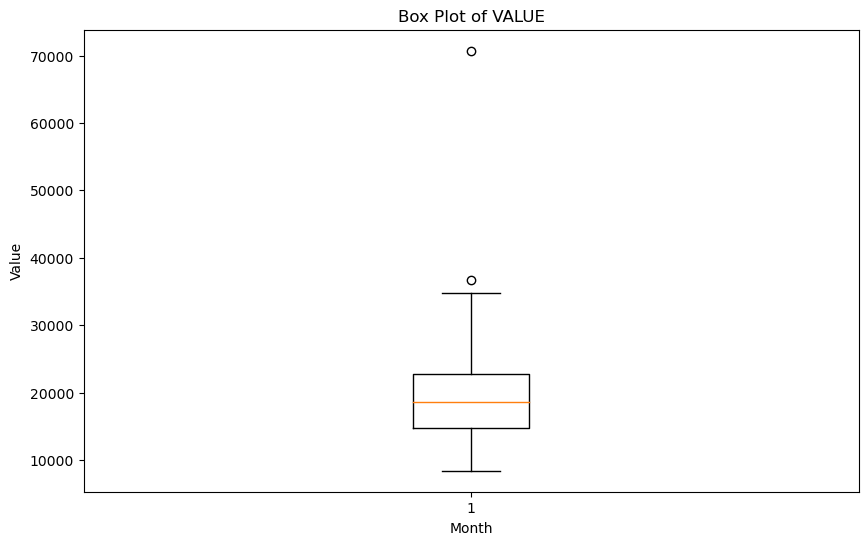

In [25]:
import matplotlib.pyplot as plt

# Box plot of the column "VALUE"
def show_box_plot(dataset):
    values = dataset.select("VALUE").rdd.flatMap(lambda x: x).collect()

    # Plotting the box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(values)
    plt.title('Box Plot of VALUE')
    plt.ylabel('Value')
    plt.xlabel('Month')
    plt.show()
    
#box plot of american dataset
show_box_plot(result_df)

In [26]:
# show statistics metrics
result_df.describe("VALUE").show()

+-------+-----------------+
|summary|            VALUE|
+-------+-----------------+
|  count|              218|
|   mean|19562.72018348624|
| stddev|6753.789771393583|
|    min|             8398|
|    max|            70713|
+-------+-----------------+



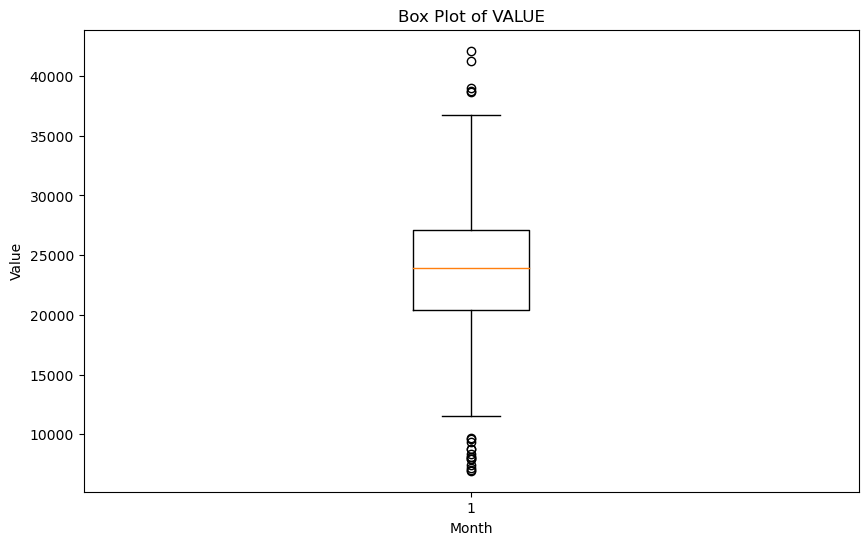

In [27]:
#box plot of american dataset
show_box_plot(result_df_gb)

In [28]:
# show statistics metrics of british dataset
result_df_gb.describe("VALUE").show()

+-------+------------------+
|summary|             VALUE|
+-------+------------------+
|  count|               218|
|   mean|23618.261467889908|
| stddev| 6509.325750332842|
|    min|              6949|
|    max|             42119|
+-------+------------------+



In [29]:
#!pip install tensorflow
# As tensorflow it got some troubles to installing because of the "error: externally-managed-environment"
#another solution is the use of pytorch library

In [30]:
# check installed libraries
#!pip list

In [31]:
#!pip install torch

In [32]:
# Drop empty values in the "VALUE" column
dropped_df = result_df.dropna(subset=['VALUE'])

# Show the last 5 rows of the result DataFrame
dropped_df.show(5)


+-------------+--------------------+-----+
|        Month|     Commodity group|VALUE|
+-------------+--------------------+-----+
| 2015 January|Chemical material...|11176|
|2015 February|Chemical material...|12978|
|   2015 March|Chemical material...|16084|
|   2015 April|Chemical material...|13355|
|     2015 May|Chemical material...|14691|
+-------------+--------------------+-----+
only showing top 5 rows



In [33]:
result_df.count()

218

In [34]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler


# Vector Assembler to convert features to a single vector column
vecAssembler = VectorAssembler(inputCols=["VALUE"], outputCol="features")
df_new = vecAssembler.transform(result_df).select("features")
df_new_gb = vecAssembler.transform(result_df_gb).select("features")

In [35]:
print(df_new_gb)

DataFrame[features: vector]


In [36]:
# Convert Spark DataFrame to RDD and then to NumPy array
data_array = np.array(df_new.rdd.map(lambda x: x.features[0]).collect())
data_array_gb = np.array(df_new_gb.rdd.map(lambda x: x.features[0]).collect())

# Preprocess the data in the american dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_array.reshape(-1, 1))
scaled_data_gb = scaler.fit_transform(data_array_gb.reshape(-1, 1))


In [37]:
# Define a function to create sequences for input/output
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [38]:
# Define sequence length and split data into training and testing sets
sequence_length = 10

# american train size
train_size = int(len(scaled_data) * 0.7)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]

# gb dataset train size
train_size_gb = int(len(scaled_data_gb) * 0.7)
test_size_gb = len(scaled_data_gb) - train_size_gb
train_data_gb, test_data_gb = scaled_data_gb[0:train_size_gb], scaled_data_gb[train_size_gb:len(scaled_data_gb)]

In [39]:
train_size_gb

152

In [40]:
# Create sequences for training and testing sets
#american part
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# british part
X_train_gb, y_train_gb = create_sequences(train_data_gb, sequence_length)
X_test_gb, y_test_gb = create_sequences(test_data_gb, sequence_length)

In [41]:
# Convert data to PyTorch tensors
# american part:
X_train = torch.Tensor(X_train).unsqueeze(2)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test).unsqueeze(2)
y_test = torch.Tensor(y_test)

# british part:
X_train_gb = torch.Tensor(X_train_gb).unsqueeze(2)
y_train_gb = torch.Tensor(y_train_gb)
X_test_gb = torch.Tensor(X_test_gb).unsqueeze(2)
y_test_gb = torch.Tensor(y_test_gb)

In [42]:
# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [43]:
# Instantiate the model, define loss function and optimizer
loss_function = nn.MSELoss()

#american part:
model = LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#british part
model_gb = LSTM()
optimizer_gb = torch.optim.Adam(model_gb.parameters(), lr=0.001)

In [44]:
# Train the model
epochs = 150

# function to train the model
def train_model(x_train,y_train,optimizer,model):
    for i in range(epochs):
        for seq, labels in zip(x_train, y_train):
            optimizer.zero_grad()
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                            torch.zeros(1, 1, model.hidden_layer_size))

            y_pred = model(seq)

            single_loss = loss_function(y_pred, labels)
            single_loss.backward()
            optimizer.step()

        if i%25 == 0:
            print(f'Epoch: {i:3} loss: {single_loss.item():10.8f}')

# train USA part:           
train_model(X_train, y_train,optimizer,model)    

Epoch:   0 loss: 0.00338980
Epoch:  25 loss: 0.00096648
Epoch:  50 loss: 0.00057988
Epoch:  75 loss: 0.00053178
Epoch: 100 loss: 0.00033822
Epoch: 125 loss: 0.00025278


In [45]:
# train USA part:           
train_model(X_train_gb, y_train_gb,optimizer_gb,model_gb) 

Epoch:   0 loss: 0.00394098
Epoch:  25 loss: 0.00353596
Epoch:  50 loss: 0.00269940
Epoch:  75 loss: 0.00248216
Epoch: 100 loss: 0.00161055
Epoch: 125 loss: 0.00283205


In [46]:
# Test the model

def get_mse(model,x_test, y_test):
    test_losses = []
    with torch.no_grad():
        for seq, labels in zip(x_test, y_test):
            y_pred = model(seq)
            test_loss = loss_function(y_pred, labels)
            test_losses.append(test_loss.item())

    # MSE Mean Squared Error (MSE) after training the model         
    print(f'Average Test Loss, MSE: {np.mean(test_losses):10.8f}')
    
# get american mse in LSTM:
get_mse(model,X_test,y_test)


Average Test Loss, MSE: 0.02861774


In [47]:
# get british mse in LSTM:
get_mse(model_gb,X_test_gb,y_test_gb)

Average Test Loss, MSE: 0.05120685


In [48]:
# Make predictions
predictions = []
with torch.no_grad():
    for seq in X_test:
        predictions.append(model(seq).item())


In [49]:
# Make predictions
predictions_gb = []
with torch.no_grad():
    for seq in X_test_gb:
        predictions_gb.append(model_gb(seq).item())

In [50]:
# Inverse transform the predictions
predicted_values = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
predicted_values_gb = scaler.inverse_transform(np.array(predictions_gb).reshape(-1, 1))

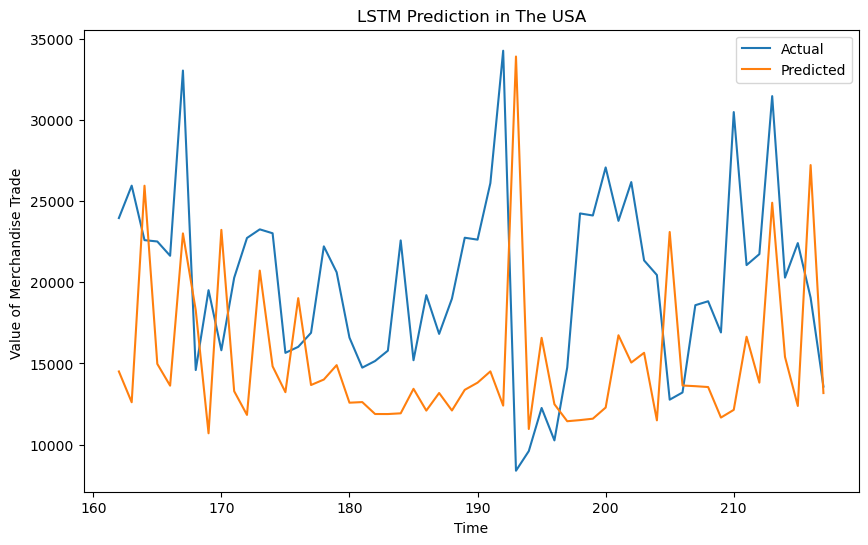

In [51]:
# Plot the results
import matplotlib.pyplot as plt

def show_plot_lstm(data_array,predicted_values,country):
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(data_array) - len(predicted_values), len(data_array)), data_array[-len(predicted_values):], label='Actual')
    plt.plot(range(len(data_array) - len(predicted_values), len(data_array)), predicted_values, label='Predicted')
    plt.xlabel('Time')
    plt.ylabel("Value of Merchandise Trade ")
    plt.title('LSTM Prediction in '  + country)
    plt.legend()
    plt.show()

# show american part:
show_plot_lstm(data_array,predicted_values,"The USA")

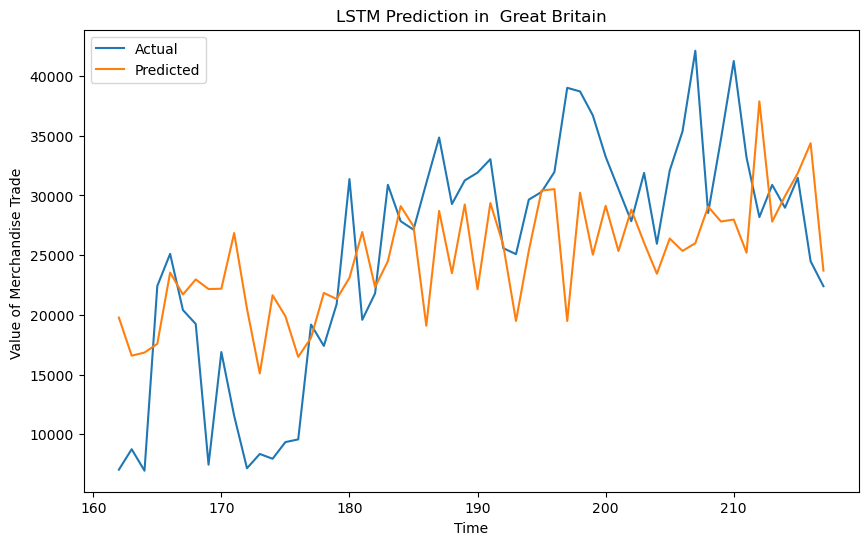

In [52]:
# show british:
show_plot_lstm(data_array_gb,predicted_values_gb," Great Britain")

In [53]:
#import torch
#import torch.nn as nn
#import numpy as np

# Define the GRU model
class GRU(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.gru = nn.GRU(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = torch.zeros(1, 1, self.hidden_layer_size)

    def forward(self, input_seq):
        gru_out, self.hidden_cell = self.gru(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(gru_out.view(len(input_seq), -1))
        return predictions[-1]



In [54]:
# Instantiate the model, define loss function and optimizer
#american part:
model_gru = GRU()
#loss_function = nn.MSELoss()
optimizer_gru = torch.optim.Adam(model_gru.parameters(), lr=0.001)

# british part
model_gru_gb = GRU()
optimizer_gru_gb = torch.optim.Adam(model_gru_gb.parameters(), lr=0.001)


In [55]:
# Train the model

#American part:
def train_model_gru(X_train, y_train,model,optimizer):
    for i in range(epochs):
        for seq, labels in zip(X_train, y_train):
            optimizer.zero_grad()
            model.hidden_cell = torch.zeros(1, 1, model.hidden_layer_size)

            y_pred = model(seq)

            single_loss = loss_function(y_pred, labels)
            single_loss.backward()
            optimizer.step()

        if i % 25 == 0:
            print(f'Epoch: {i:3} loss: {single_loss.item():10.8f}')

# training american part:
train_model_gru(X_train, y_train,model_gru,optimizer_gru)

Epoch:   0 loss: 0.00053332
Epoch:  25 loss: 0.00059335
Epoch:  50 loss: 0.00033663
Epoch:  75 loss: 0.00055788
Epoch: 100 loss: 0.00102087
Epoch: 125 loss: 0.00009290


In [56]:
# training american part:
train_model_gru(X_train_gb, y_train_gb,model_gru_gb,optimizer_gru_gb)

Epoch:   0 loss: 0.00271742
Epoch:  25 loss: 0.00270201
Epoch:  50 loss: 0.00215432
Epoch:  75 loss: 0.00305611
Epoch: 100 loss: 0.00050506
Epoch: 125 loss: 0.00045351


In [57]:
# get american MSE in GRU model
get_mse(model_gru,X_test, y_test)

Average Test Loss, MSE: 0.02003842


In [58]:
# get british MSE in GRU model
get_mse(model_gru_gb,X_test_gb, y_test_gb)

Average Test Loss, MSE: 0.09169203


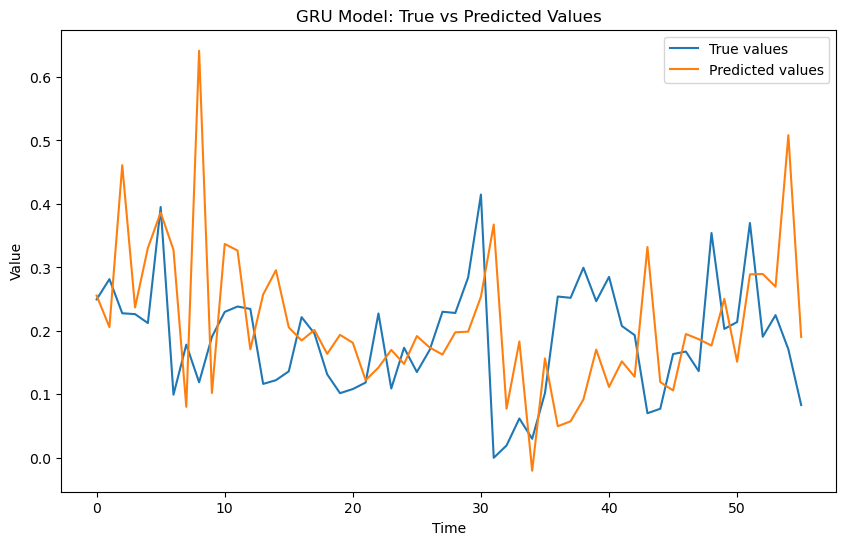

In [69]:

def make_predictions(X_test_gb,model,y_test):
    predicted_values = []
    with torch.no_grad():
        for seq in X_test_gb:
            y_pred = model(seq)
            predicted_values.append(y_pred.item())

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label="True values")
    plt.plot(predicted_values, label="Predicted values")
    plt.title("GRU Model: True vs Predicted Values")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()
    
#applying function in american part:    
make_predictions(X_test,model_gru,y_test)

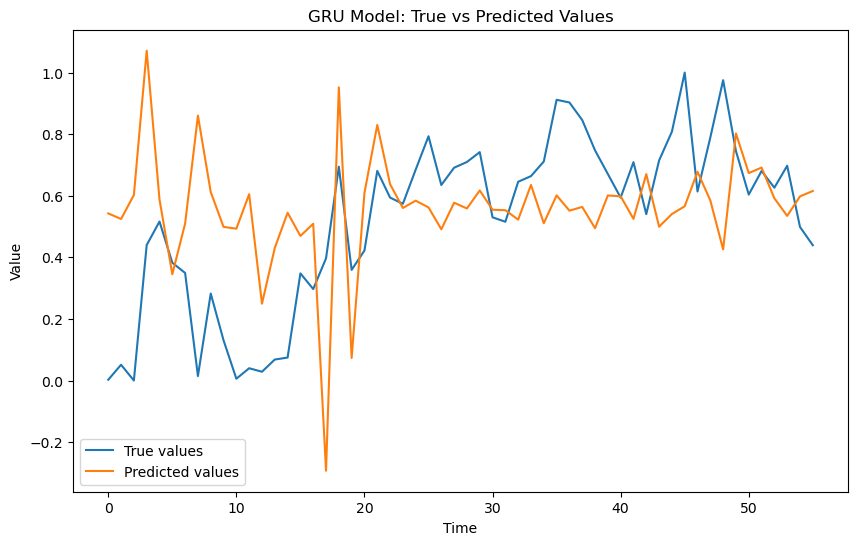

In [70]:
make_predictions(X_test_gb,model_gru_gb,y_test_gb)

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>SUMMARY: </title>
</head>
<body>

<table border="1">
  <thead>
    <tr>
      <th></th>
      <th>USA</th>
      <th>Great Britain</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>MSE in LSTM model</th>
      <td>0.02861</td>
      <td>0.05120</td>
    </tr>
    <tr>
      <th>MSE in GRU model</th>
      <td>0.02000</td>
      <td>0.09169</td>
    </tr>
  </tbody>
</table>

</body>
</html>


In [63]:
# Stop the SparkSession
spark.stop()